In [1]:
import sys
sys.path.insert(0, '/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/src')
import pandas as pd
import numpy as np
import roboscientist.equation.equation as rs_equation
from experiments import run_experiment

import roboscientist.equation.operators as rs_operators
from scipy.special import lambertw


import matplotlib.pyplot as plt

In [132]:
Data=pd.read_pickle('./S_S_data_for_simbolic.pkl')
Data= pd.DataFrame(Data)
Data

,distance,dx,dy,dz,formE
6141d01851c1cbd9654b8890,3.124591,0.000000,0.000000,-3.124591e+00,2.639464
6141d06451c1cbd9654b8892,3.190316,22.332210,0.000000,-1.332268e-15,2.636693
6141cf6d51c1cbd9654b8882,4.465555,1.595158,2.762894,-3.124591e+00,2.693197
6141d0e151c1cbd9654b8894,5.525789,4.785474,2.762894,0.000000e+00,2.654705
6141cf0f51c1cbd9654b8870,6.348024,4.785474,2.762894,-3.124591e+00,2.653139
6141cf1651c1cbd9654b8876,6.380631,22.332210,5.525789,-4.440892e-16,2.669060
6141d00951c1cbd9654b888e,7.104613,3.190316,5.525789,-3.124591e+00,2.657065
6141cf3451c1cbd9654b887e,8.440782,11.166105,13.814472,8.881784e-16,2.656502
6141cf2d51c1cbd9654b887c,9.000548,6.380631,5.525789,-3.124591e+00,2.659103
6141cf1351c1cbd9654b8874,9.570947,7.975789,13.814472,-1.776357e-15,2.664542


In [126]:
Data_for_sibolic = Data.to_numpy()

X = np.array([Data_for_sibolic[var][0].tolist() for var in range(Data_for_sibolic.shape[0])]).reshape(-1,1)

y = Data_for_sibolic[:,4]

Z=np.array([Data_for_sibolic[var][3].tolist() for var in range(Data_for_sibolic.shape[0])]).reshape(-1,1)



#for i in range(Z.shape[0]):
#    np.append(X[i],Z[i])

#Dataset=np.append(X,Z,axis=1)
Dataset=X
Dy = y
Dataset


#Xl1=Dataset[abs(Z)>1]
#Xl2=Dataset[abs(Z)<1]



array([[ 3.12459084],
       [ 3.1903157 ],
       [ 4.46555508],
       [ 5.52578888],
       [ 6.34802416],
       [ 6.3806314 ],
       [ 7.10461294],
       [ 8.44078195],
       [ 9.00054819],
       [ 9.5709471 ],
       [10.06807312],
       [11.05157777],
       [11.48479164],
       [11.50284684],
       [11.91967086],
       [12.7612628 ],
       [13.13822272],
       [13.90626373],
       [14.25297299]])

In [127]:
Dataset=Dataset[abs(Z)<1]
#Dy = Dy[abs(Z.reshape(-1))<1] - Dy[abs(Z.reshape(-1))<1].max()

Dy = Dy[abs(Z.reshape(-1))<1] -2.661751
Dataset

array([ 3.1903157 ,  5.52578888,  6.3806314 ,  8.44078195,  9.5709471 ,
       11.05157777, 11.50284684, 12.7612628 , 13.90626373])

In [90]:
x_lows = [Dataset.min(axis=0)]
x_highs = [Dataset.max(axis=0)]
y_dom = (Dy.min()-0.005, Dy.max()+0.005)
domains_grid = (x_lows, x_highs, y_dom)

print(x_lows, x_highs, y_dom)

Dataset=Dataset.reshape(-1,1)

[3.1903156999999993] [13.906263734291226] (-0.030057794999971518, 0.012308560000050425)


In [91]:
def get_sub_trees_of_binary(list_of_tokens, idx):
    if list_of_tokens[idx] in rs_operators.OPERATORS:
        open_nodes = rs_operators.OPERATORS[list_of_tokens[idx]].arity
    else:
        open_nodes = 0
    left, right = [], []
    current_sub_tree = left
    for i, token in enumerate(list_of_tokens[idx + 1:]):
        if open_nodes == 0:
            break
        if open_nodes == 1:
            current_sub_tree = right
        current_sub_tree.append(token)

        if token in rs_operators.OPERATORS:
            operator = rs_operators.OPERATORS[token]
            open_nodes += operator.arity - 1
        else:
            open_nodes -= 1
    return left, right

def get_offsprings(list_of_tokens, idx):
    if list_of_tokens[idx] in rs_operators.OPERATORS:
        open_nodes = rs_operators.OPERATORS[list_of_tokens[idx]].arity
    else:
        open_nodes = 0
    traversal = []
    for i, token in enumerate(list_of_tokens[idx + 1:]):
        if open_nodes == 0:
            break
        traversal.append(token)
        if token in rs_operators.OPERATORS:
            operator = rs_operators.OPERATORS[token]
            open_nodes += operator.arity - 1
        else:
            open_nodes -= 1

    return traversal

def predicate(list_of_tokens, chek = False):

        
#    if list_of_tokens[0] == 'add':
 #       left, right = get_sub_trees_of_binary(list_of_tokens, 0)
  #      if right not in rs_operators or left !='div':
   #             return False

  #if  'X**-2' not in list_of_tokens:
   #   return False
    
#    if 'x1'  not in list_of_tokens :
#        return False

#   if 'cos**2' not in list_of_tokens and 'sin**2' not in list_of_tokens and 'sin' not in list_of_tokens and 'cos' not in list_of_tokens :
#       return False
    
 #   if list_of_tokens[0] != 'add_oscil':
  #      return False

    for i, token in enumerate(list_of_tokens):
        offsprings = get_offsprings(list_of_tokens, i)      
        if  token == 'exp'  or token == 'pow2' or token == 'pow' or token == 'cos' :
            if  'exp' in offsprings or 'pow2' in offsprings  or 'pow' in offsprings or 'cos' in offsprings  :

                return False
           
            
            
    return True


In [92]:
solver = run_experiment(Dataset, Dy,
        functions=['add', 'sub', 'mul', 'div','pow2','cos','exp','pow'],
        #functions=list(rs_operators.OPERATORS.keys()),
        #free_variables=['x1','x2','x3','x4','x5','x6'],
        free_variables=['x1'],
        wandb_proj='SEGVAE2',
        project_name='SEGVAE2_S_S_l1_1200',
        constants=[],
        float_constants=rs_operators.FLOAT_CONST + rs_operators.INT_CONST,
        #float_constants=None,
        epochs=1200,
        n_formulas_to_sample=5000,
        max_formula_length=25,
        formula_predicate=predicate,
        true_formula=rs_equation.Equation(['5']),
        latent=128,
        lstm_hidden_dim=64,
        device='cuda',
        train_size=50000,
        log_intermediate_steps=True,
        domains=domains_grid,
        simplification=False,
        pretrain_path=None)

wandb: Currently logged in as: mikelazarev. Use `wandb login --relogin` to force relogin


===== START PRETRAIN =====
	[training] batches count: 196
	[training] loss: 20.160, rec loss: 20.081, kl: 0.157
	[validation] loss: 16.962, rec loss: 16.949, kl: 0.026
	[training] batches count: 196
	[training] loss: 17.641, rec loss: 17.626, kl: 0.029
	[validation] loss: 15.833, rec loss: 15.825, kl: 0.016
	[training] batches count: 196
	[training] loss: 16.974, rec loss: 16.964, kl: 0.021
	[validation] loss: 15.607, rec loss: 15.597, kl: 0.021
	[training] batches count: 196
	[training] loss: 16.747, rec loss: 16.731, kl: 0.032
	[validation] loss: 15.397, rec loss: 15.378, kl: 0.039
	[training] batches count: 196
	[training] loss: 16.620, rec loss: 16.588, kl: 0.064
	[validation] loss: 15.257, rec loss: 15.222, kl: 0.068
	[training] batches count: 196
	[training] loss: 16.510, rec loss: 16.459, kl: 0.102
	[validation] loss: 15.252, rec loss: 15.180, kl: 0.143
	[training] batches count: 196
	[training] loss: 16.448, rec loss: 16.355, kl: 0.185
	[validation] loss: 15.151, rec loss: 15.0

	[training] batches count: 1
	[training] loss: 12.902, rec loss: 10.771, kl: 4.261
	[validation] loss: 12.268, rec loss: 10.303, kl: 3.930
	[training] batches count: 1
	[training] loss: 12.040, rec loss: 10.157, kl: 3.767
	[validation] loss: 11.599, rec loss: 9.869, kl: 3.461
	[training] batches count: 1
	[training] loss: 10.938, rec loss: 9.230, kl: 3.416
	[validation] loss: 11.052, rec loss: 9.414, kl: 3.275
	[training] batches count: 1
	[training] loss: 10.610, rec loss: 8.955, kl: 3.311
	[validation] loss: 10.369, rec loss: 8.760, kl: 3.217
	[training] batches count: 1
	[training] loss: 11.868, rec loss: 10.244, kl: 3.247
	[validation] loss: 11.503, rec loss: 9.914, kl: 3.178
	[training] batches count: 1
	[training] loss: 11.042, rec loss: 9.512, kl: 3.059
	[validation] loss: 11.463, rec loss: 9.943, kl: 3.040
	[training] batches count: 1
	[training] loss: 12.282, rec loss: 10.728, kl: 3.110
	[validation] loss: 11.553, rec loss: 9.935, kl: 3.235
	[training] batches count: 1
	[train

	[training] batches count: 1
	[training] loss: 10.643, rec loss: 9.333, kl: 2.621
	[validation] loss: 10.351, rec loss: 9.030, kl: 2.643
	[training] batches count: 1
	[training] loss: 10.611, rec loss: 9.276, kl: 2.671
	[validation] loss: 9.965, rec loss: 8.617, kl: 2.697
	[training] batches count: 1
	[training] loss: 10.177, rec loss: 8.851, kl: 2.652
	[validation] loss: 9.971, rec loss: 8.651, kl: 2.640
	[training] batches count: 1
	[training] loss: 10.523, rec loss: 9.190, kl: 2.665
	[validation] loss: 10.227, rec loss: 8.853, kl: 2.748
	[training] batches count: 1
	[training] loss: 12.513, rec loss: 11.206, kl: 2.614
	[validation] loss: 12.612, rec loss: 11.142, kl: 2.940
	[training] batches count: 1
	[training] loss: 13.249, rec loss: 11.768, kl: 2.961
	[validation] loss: 12.606, rec loss: 11.118, kl: 2.976
	[training] batches count: 1
	[training] loss: 12.429, rec loss: 10.967, kl: 2.925
	[validation] loss: 12.321, rec loss: 10.918, kl: 2.806
	[training] batches count: 1
	[traini

	[training] batches count: 1
	[training] loss: 11.982, rec loss: 10.940, kl: 2.084
	[validation] loss: 11.843, rec loss: 10.798, kl: 2.090
	[training] batches count: 1
	[training] loss: 12.238, rec loss: 11.172, kl: 2.132
	[validation] loss: 11.823, rec loss: 10.781, kl: 2.084
	[training] batches count: 1
	[training] loss: 12.220, rec loss: 11.196, kl: 2.048
	[validation] loss: 11.893, rec loss: 10.848, kl: 2.090
	[training] batches count: 1
	[training] loss: 12.169, rec loss: 11.109, kl: 2.118
	[validation] loss: 11.843, rec loss: 10.772, kl: 2.141
	[training] batches count: 1
	[training] loss: 12.178, rec loss: 11.040, kl: 2.276
	[validation] loss: 11.913, rec loss: 10.801, kl: 2.223
	[training] batches count: 1
	[training] loss: 12.490, rec loss: 11.406, kl: 2.167
	[validation] loss: 12.112, rec loss: 11.035, kl: 2.155
	[training] batches count: 1
	[training] loss: 12.897, rec loss: 11.935, kl: 1.925
	[validation] loss: 12.581, rec loss: 11.534, kl: 2.094
	[training] batches count: 

	[training] batches count: 1
	[training] loss: 13.175, rec loss: 12.122, kl: 2.106
	[validation] loss: 12.845, rec loss: 11.795, kl: 2.101
	[training] batches count: 1
	[training] loss: 13.263, rec loss: 12.203, kl: 2.120
	[validation] loss: 12.864, rec loss: 11.820, kl: 2.089
	[training] batches count: 1
	[training] loss: 13.381, rec loss: 12.330, kl: 2.102
	[validation] loss: 12.891, rec loss: 11.827, kl: 2.127
	[training] batches count: 1
	[training] loss: 13.625, rec loss: 12.566, kl: 2.118
	[validation] loss: 13.226, rec loss: 12.144, kl: 2.164
	[training] batches count: 1
	[training] loss: 13.820, rec loss: 12.738, kl: 2.163
	[validation] loss: 13.290, rec loss: 12.185, kl: 2.211
	[training] batches count: 1
	[training] loss: 14.235, rec loss: 13.065, kl: 2.339
	[validation] loss: 13.665, rec loss: 12.470, kl: 2.389
	[training] batches count: 1
	[training] loss: 14.143, rec loss: 12.948, kl: 2.391
	[validation] loss: 13.617, rec loss: 12.406, kl: 2.423
	[training] batches count: 

	[training] batches count: 1
	[training] loss: 14.203, rec loss: 13.216, kl: 1.974
	[validation] loss: 13.818, rec loss: 12.813, kl: 2.009
	[training] batches count: 1
	[training] loss: 14.082, rec loss: 13.083, kl: 1.998
	[validation] loss: 13.560, rec loss: 12.560, kl: 2.000
	[training] batches count: 1
	[training] loss: 14.322, rec loss: 13.312, kl: 2.022
	[validation] loss: 13.855, rec loss: 12.872, kl: 1.966
	[training] batches count: 1
	[training] loss: 14.537, rec loss: 13.546, kl: 1.983
	[validation] loss: 14.215, rec loss: 13.203, kl: 2.023
	[training] batches count: 1
	[training] loss: 14.702, rec loss: 13.688, kl: 2.027
	[validation] loss: 14.259, rec loss: 13.279, kl: 1.959
	[training] batches count: 1
	[training] loss: 14.090, rec loss: 13.144, kl: 1.892
	[validation] loss: 13.662, rec loss: 12.743, kl: 1.838
	[training] batches count: 1
	[training] loss: 14.297, rec loss: 13.365, kl: 1.864
	[validation] loss: 13.656, rec loss: 12.720, kl: 1.872
	[training] batches count: 

wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.


	[training] batches count: 1
	[training] loss: 14.110, rec loss: 13.123, kl: 1.972
	[validation] loss: 13.814, rec loss: 12.854, kl: 1.920
	[training] batches count: 1
	[training] loss: 13.991, rec loss: 13.041, kl: 1.899
	[validation] loss: 13.546, rec loss: 12.624, kl: 1.846
	[training] batches count: 1
	[training] loss: 14.437, rec loss: 13.507, kl: 1.861
	[validation] loss: 13.891, rec loss: 12.922, kl: 1.938
	[training] batches count: 1
	[training] loss: 14.360, rec loss: 13.386, kl: 1.947
	[validation] loss: 13.961, rec loss: 13.013, kl: 1.896
	[training] batches count: 1
	[training] loss: 14.611, rec loss: 13.660, kl: 1.902
	[validation] loss: 14.090, rec loss: 13.159, kl: 1.862
	[training] batches count: 1
	[training] loss: 14.821, rec loss: 13.872, kl: 1.898
	[validation] loss: 14.375, rec loss: 13.426, kl: 1.897
	[training] batches count: 1
	[training] loss: 15.057, rec loss: 14.081, kl: 1.951
	[validation] loss: 14.401, rec loss: 13.402, kl: 1.998
	[training] batches count: 

	[training] batches count: 1
	[training] loss: 11.810, rec loss: 10.956, kl: 1.708
	[validation] loss: 11.307, rec loss: 10.507, kl: 1.599
	[training] batches count: 1
	[training] loss: 11.712, rec loss: 10.951, kl: 1.523
	[validation] loss: 11.279, rec loss: 10.507, kl: 1.543
	[training] batches count: 1
	[training] loss: 11.116, rec loss: 10.368, kl: 1.496
	[validation] loss: 10.747, rec loss: 9.972, kl: 1.549
	[training] batches count: 1
	[training] loss: 11.073, rec loss: 10.317, kl: 1.512
	[validation] loss: 10.703, rec loss: 9.984, kl: 1.436
	[training] batches count: 1
	[training] loss: 10.471, rec loss: 9.767, kl: 1.408
	[validation] loss: 10.008, rec loss: 9.329, kl: 1.357
	[training] batches count: 1
	[training] loss: 10.201, rec loss: 9.527, kl: 1.348
	[validation] loss: 9.592, rec loss: 8.889, kl: 1.407
	[training] batches count: 1
	[training] loss: 9.874, rec loss: 9.144, kl: 1.460
	[validation] loss: 9.247, rec loss: 8.505, kl: 1.485
	[training] batches count: 1
	[trainin

	[training] batches count: 1
	[training] loss: 8.552, rec loss: 8.011, kl: 1.081
	[validation] loss: 8.429, rec loss: 7.876, kl: 1.105
	[training] batches count: 1
	[training] loss: 8.916, rec loss: 8.350, kl: 1.133
	[validation] loss: 8.442, rec loss: 7.926, kl: 1.033
	[training] batches count: 1
	[training] loss: 8.441, rec loss: 7.928, kl: 1.025
	[validation] loss: 8.238, rec loss: 7.711, kl: 1.055
	[training] batches count: 1
	[training] loss: 8.569, rec loss: 8.043, kl: 1.052
	[validation] loss: 8.147, rec loss: 7.634, kl: 1.027
	[training] batches count: 1
	[training] loss: 8.466, rec loss: 7.948, kl: 1.036
	[validation] loss: 8.004, rec loss: 7.472, kl: 1.065
	[training] batches count: 1
	[training] loss: 8.837, rec loss: 8.311, kl: 1.052
	[validation] loss: 8.219, rec loss: 7.670, kl: 1.099
	[training] batches count: 1
	[training] loss: 8.879, rec loss: 8.335, kl: 1.089
	[validation] loss: 8.393, rec loss: 7.849, kl: 1.089
	[training] batches count: 1
	[training] loss: 9.108, r

	[training] batches count: 1
	[training] loss: 12.363, rec loss: 11.796, kl: 1.133
	[validation] loss: 11.415, rec loss: 10.840, kl: 1.150
	[training] batches count: 1
	[training] loss: 12.163, rec loss: 11.580, kl: 1.166
	[validation] loss: 11.208, rec loss: 10.633, kl: 1.151
	[training] batches count: 1
	[training] loss: 11.360, rec loss: 10.766, kl: 1.189
	[validation] loss: 10.695, rec loss: 10.090, kl: 1.209
	[training] batches count: 1
	[training] loss: 11.385, rec loss: 10.784, kl: 1.202
	[validation] loss: 10.680, rec loss: 10.071, kl: 1.218
	[training] batches count: 1
	[training] loss: 10.609, rec loss: 10.005, kl: 1.208
	[validation] loss: 9.909, rec loss: 9.284, kl: 1.251
	[training] batches count: 1
	[training] loss: 10.605, rec loss: 9.996, kl: 1.220
	[validation] loss: 9.958, rec loss: 9.323, kl: 1.270
	[training] batches count: 1
	[training] loss: 10.347, rec loss: 9.726, kl: 1.242
	[validation] loss: 9.595, rec loss: 8.952, kl: 1.286
	[training] batches count: 1
	[trai

	[training] batches count: 1
	[training] loss: 9.084, rec loss: 8.401, kl: 1.365
	[validation] loss: 8.739, rec loss: 8.066, kl: 1.347
	[training] batches count: 1
	[training] loss: 9.237, rec loss: 8.556, kl: 1.361
	[validation] loss: 8.741, rec loss: 8.036, kl: 1.410
	[training] batches count: 1
	[training] loss: 10.159, rec loss: 9.347, kl: 1.624
	[validation] loss: 9.226, rec loss: 8.464, kl: 1.526
	[training] batches count: 1
	[training] loss: 9.810, rec loss: 9.071, kl: 1.479
	[validation] loss: 8.911, rec loss: 8.176, kl: 1.470
	[training] batches count: 1
	[training] loss: 9.507, rec loss: 8.757, kl: 1.499
	[validation] loss: 8.834, rec loss: 8.102, kl: 1.464
	[training] batches count: 1
	[training] loss: 9.359, rec loss: 8.643, kl: 1.432
	[validation] loss: 8.574, rec loss: 7.877, kl: 1.394
	[training] batches count: 1
	[training] loss: 8.952, rec loss: 8.230, kl: 1.445
	[validation] loss: 8.312, rec loss: 7.625, kl: 1.373
	[training] batches count: 1
	[training] loss: 8.743, 

	[training] batches count: 1
	[training] loss: 8.367, rec loss: 7.597, kl: 1.542
	[validation] loss: 8.359, rec loss: 7.643, kl: 1.431
	[training] batches count: 1
	[training] loss: 9.066, rec loss: 8.361, kl: 1.410
	[validation] loss: 7.921, rec loss: 7.212, kl: 1.419
	[training] batches count: 1
	[training] loss: 8.581, rec loss: 7.847, kl: 1.468
	[validation] loss: 8.206, rec loss: 7.490, kl: 1.432
	[training] batches count: 1
	[training] loss: 8.526, rec loss: 7.824, kl: 1.405
	[validation] loss: 7.986, rec loss: 7.298, kl: 1.377
	[training] batches count: 1
	[training] loss: 8.561, rec loss: 7.894, kl: 1.334
	[validation] loss: 8.121, rec loss: 7.471, kl: 1.301
	[training] batches count: 1
	[training] loss: 8.431, rec loss: 7.791, kl: 1.280
	[validation] loss: 7.957, rec loss: 7.313, kl: 1.287
	[training] batches count: 1
	[training] loss: 8.411, rec loss: 7.772, kl: 1.278
	[validation] loss: 7.779, rec loss: 7.123, kl: 1.313
	[training] batches count: 1
	[training] loss: 8.336, r

wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.


	[training] batches count: 1
	[training] loss: 8.994, rec loss: 8.532, kl: 0.925
	[validation] loss: 8.245, rec loss: 7.784, kl: 0.922
	[training] batches count: 1
	[training] loss: 8.789, rec loss: 8.335, kl: 0.907
	[validation] loss: 8.293, rec loss: 7.834, kl: 0.918
	[training] batches count: 1
	[training] loss: 8.659, rec loss: 8.196, kl: 0.925
	[validation] loss: 8.018, rec loss: 7.588, kl: 0.861
	[training] batches count: 1
	[training] loss: 8.726, rec loss: 8.297, kl: 0.858
	[validation] loss: 8.329, rec loss: 7.904, kl: 0.849
	[training] batches count: 1
	[training] loss: 8.370, rec loss: 7.957, kl: 0.825
	[validation] loss: 7.884, rec loss: 7.450, kl: 0.868
	[training] batches count: 1
	[training] loss: 8.573, rec loss: 8.162, kl: 0.822
	[validation] loss: 8.059, rec loss: 7.642, kl: 0.834
	[training] batches count: 1
	[training] loss: 8.716, rec loss: 8.276, kl: 0.878
	[validation] loss: 8.463, rec loss: 8.017, kl: 0.893
	[training] batches count: 1
	[training] loss: 9.526, r

	[training] batches count: 1
	[training] loss: 8.811, rec loss: 8.164, kl: 1.294
	[validation] loss: 8.531, rec loss: 7.891, kl: 1.281
	[training] batches count: 1
	[training] loss: 8.878, rec loss: 8.231, kl: 1.294
	[validation] loss: 8.506, rec loss: 7.867, kl: 1.280
	[training] batches count: 1
	[training] loss: 9.018, rec loss: 8.373, kl: 1.289
	[validation] loss: 8.271, rec loss: 7.616, kl: 1.310
	[training] batches count: 1
	[training] loss: 8.839, rec loss: 8.153, kl: 1.372
	[validation] loss: 8.315, rec loss: 7.621, kl: 1.388
	[training] batches count: 1
	[training] loss: 8.788, rec loss: 8.100, kl: 1.375
	[validation] loss: 8.388, rec loss: 7.721, kl: 1.333
	[training] batches count: 1
	[training] loss: 8.846, rec loss: 8.176, kl: 1.339
	[validation] loss: 8.375, rec loss: 7.704, kl: 1.342
	[training] batches count: 1
	[training] loss: 8.687, rec loss: 8.004, kl: 1.367
	[validation] loss: 8.228, rec loss: 7.534, kl: 1.388
	[training] batches count: 1
	[training] loss: 8.795, r

	[training] batches count: 1
	[training] loss: 10.959, rec loss: 10.458, kl: 1.004
	[validation] loss: 10.249, rec loss: 9.754, kl: 0.989
	[training] batches count: 1
	[training] loss: 11.755, rec loss: 11.265, kl: 0.980
	[validation] loss: 10.916, rec loss: 10.427, kl: 0.980
	[training] batches count: 1
	[training] loss: 11.910, rec loss: 11.421, kl: 0.978
	[validation] loss: 11.084, rec loss: 10.556, kl: 1.055
	[training] batches count: 1
	[training] loss: 12.095, rec loss: 11.562, kl: 1.066
	[validation] loss: 11.130, rec loss: 10.586, kl: 1.087
	[training] batches count: 1
	[training] loss: 11.960, rec loss: 11.408, kl: 1.104
	[validation] loss: 11.225, rec loss: 10.657, kl: 1.136
	[training] batches count: 1
	[training] loss: 11.286, rec loss: 10.732, kl: 1.108
	[validation] loss: 10.562, rec loss: 10.017, kl: 1.090
	[training] batches count: 1
	[training] loss: 10.764, rec loss: 10.204, kl: 1.121
	[validation] loss: 9.985, rec loss: 9.416, kl: 1.138
	[training] batches count: 1
	

	[training] batches count: 1
	[training] loss: 9.975, rec loss: 9.491, kl: 0.969
	[validation] loss: 9.126, rec loss: 8.639, kl: 0.974
	[training] batches count: 1
	[training] loss: 10.063, rec loss: 9.579, kl: 0.967
	[validation] loss: 9.072, rec loss: 8.615, kl: 0.914
	[training] batches count: 1
	[training] loss: 9.824, rec loss: 9.356, kl: 0.935
	[validation] loss: 9.031, rec loss: 8.578, kl: 0.906
	[training] batches count: 1
	[training] loss: 9.526, rec loss: 9.074, kl: 0.904
	[validation] loss: 8.754, rec loss: 8.314, kl: 0.881
	[training] batches count: 1
	[training] loss: 9.481, rec loss: 9.057, kl: 0.848
	[validation] loss: 8.705, rec loss: 8.295, kl: 0.819
	[training] batches count: 1
	[training] loss: 9.299, rec loss: 8.896, kl: 0.807
	[validation] loss: 8.734, rec loss: 8.340, kl: 0.787
	[training] batches count: 1
	[training] loss: 9.267, rec loss: 8.872, kl: 0.790
	[validation] loss: 8.588, rec loss: 8.204, kl: 0.770
	[training] batches count: 1
	[training] loss: 9.559, 

	[training] batches count: 1
	[training] loss: 8.211, rec loss: 7.809, kl: 0.804
	[validation] loss: 7.647, rec loss: 7.256, kl: 0.781
	[training] batches count: 1
	[training] loss: 8.015, rec loss: 7.632, kl: 0.766
	[validation] loss: 7.447, rec loss: 7.065, kl: 0.764
	[training] batches count: 1
	[training] loss: 7.680, rec loss: 7.350, kl: 0.662
	[validation] loss: 6.962, rec loss: 6.614, kl: 0.698
	[training] batches count: 1
	[training] loss: 7.491, rec loss: 7.143, kl: 0.696
	[validation] loss: 6.266, rec loss: 5.907, kl: 0.718
	[training] batches count: 1
	[training] loss: 7.331, rec loss: 6.973, kl: 0.715
	[validation] loss: 6.475, rec loss: 6.112, kl: 0.725
	[training] batches count: 1
	[training] loss: 7.186, rec loss: 6.831, kl: 0.710
	[validation] loss: 6.392, rec loss: 6.025, kl: 0.735
	[training] batches count: 1
	[training] loss: 7.030, rec loss: 6.659, kl: 0.742
	[validation] loss: 6.272, rec loss: 5.909, kl: 0.726
	[training] batches count: 1
	[training] loss: 7.325, r

wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.


	[training] batches count: 1
	[training] loss: 7.268, rec loss: 6.903, kl: 0.730
	[validation] loss: 6.739, rec loss: 6.403, kl: 0.673
	[training] batches count: 1
	[training] loss: 7.615, rec loss: 7.275, kl: 0.681
	[validation] loss: 7.000, rec loss: 6.685, kl: 0.631
	[training] batches count: 1
	[training] loss: 7.747, rec loss: 7.432, kl: 0.631
	[validation] loss: 6.954, rec loss: 6.630, kl: 0.647
	[training] batches count: 1
	[training] loss: 7.758, rec loss: 7.432, kl: 0.652
	[validation] loss: 7.245, rec loss: 6.925, kl: 0.639
	[training] batches count: 1
	[training] loss: 7.636, rec loss: 7.316, kl: 0.639
	[validation] loss: 6.952, rec loss: 6.638, kl: 0.628
	[training] batches count: 1
	[training] loss: 8.037, rec loss: 7.724, kl: 0.625
	[validation] loss: 7.392, rec loss: 7.067, kl: 0.650
	[training] batches count: 1
	[training] loss: 7.498, rec loss: 7.168, kl: 0.660
	[validation] loss: 6.829, rec loss: 6.494, kl: 0.671
	[training] batches count: 1
	[training] loss: 8.032, r

	[training] batches count: 1
	[training] loss: 9.218, rec loss: 9.003, kl: 0.430
	[validation] loss: 8.141, rec loss: 7.917, kl: 0.449
	[training] batches count: 1
	[training] loss: 8.311, rec loss: 8.119, kl: 0.384
	[validation] loss: 7.605, rec loss: 7.379, kl: 0.453
	[training] batches count: 1
	[training] loss: 8.541, rec loss: 8.317, kl: 0.448
	[validation] loss: 7.648, rec loss: 7.448, kl: 0.401
	[training] batches count: 1
	[training] loss: 8.302, rec loss: 8.105, kl: 0.394
	[validation] loss: 7.438, rec loss: 7.281, kl: 0.315
	[training] batches count: 1
	[training] loss: 8.190, rec loss: 8.029, kl: 0.322
	[validation] loss: 7.526, rec loss: 7.392, kl: 0.266
	[training] batches count: 1
	[training] loss: 8.063, rec loss: 7.920, kl: 0.285
	[validation] loss: 7.589, rec loss: 7.479, kl: 0.220
	[training] batches count: 1
	[training] loss: 7.847, rec loss: 7.729, kl: 0.236
	[validation] loss: 7.335, rec loss: 7.235, kl: 0.200


In [133]:
Data_for_sibolic = Data.to_numpy()

X = np.array([Data_for_sibolic[var][0].tolist() for var in range(Data_for_sibolic.shape[0])]).reshape(-1,1)

y = Data_for_sibolic[:,4]

Z=np.array([Data_for_sibolic[var][3].tolist() for var in range(Data_for_sibolic.shape[0])]).reshape(-1,1)



#for i in range(Z.shape[0]):
#    np.append(X[i],Z[i])

#Dataset=np.append(X,Z,axis=1)
Dataset=X
Dy = y
Dataset


#Xl1=Dataset[abs(Z)>1]
#Xl2=Dataset[abs(Z)<1]



array([[ 3.12459084],
       [ 3.1903157 ],
       [ 4.46555508],
       [ 5.52578888],
       [ 6.34802416],
       [ 6.3806314 ],
       [ 7.10461294],
       [ 8.44078195],
       [ 9.00054819],
       [ 9.5709471 ],
       [10.06807312],
       [11.05157777],
       [11.48479164],
       [11.50284684],
       [11.91967086],
       [12.7612628 ],
       [13.13822272],
       [13.90626373],
       [14.25297299]])

In [134]:
Dataset=Dataset[abs(Z)>1]
#Dy = Dy[abs(Z.reshape(-1))>1]- Dy[abs(Z.reshape(-1))<1].max()
Dy = Dy[abs(Z.reshape(-1))>1]-2.663782

Dataset

array([ 3.12459084,  4.46555508,  6.34802416,  7.10461294,  9.00054819,
       10.06807312, 11.48479164, 11.91967086, 13.13822272, 14.25297299])

Python 3.8.13


In [95]:
x_lows = [Dataset.min(axis=0)]
x_highs = [Dataset.max(axis=0)]
y_dom = (Dy.min()-0.005, Dy.max()+0.005)
domains_grid = (x_lows, x_highs, y_dom)

print(x_lows, x_highs, y_dom)

Dataset=Dataset.reshape(-1,1)

[3.1245908399999998] [14.252972986892079] (-0.029318304999982222, 0.034414880000073304)


In [14]:
Dataset

array([[ 3.12459084],
       [ 4.46555508],
       [ 6.34802416],
       [ 7.10461294],
       [ 9.00054819],
       [10.06807312],
       [11.48479164],
       [11.91967086],
       [13.13822272],
       [14.25297299]])

In [96]:
solver = run_experiment(Dataset, Dy,
        functions=['add', 'sub', 'mul', 'div','pow2','cos','exp','pow'],
        #functions=list(rs_operators.OPERATORS.keys()),
        #free_variables=['x1','x2','x3','x4','x5','x6'],
        free_variables=['x1'],
        wandb_proj='SEGVAE2',
        project_name='SEGVAE2_S_S_l2_1200',
        constants=[],
        float_constants=rs_operators.FLOAT_CONST + rs_operators.INT_CONST,
        #float_constants=None,
        epochs=1200,
        n_formulas_to_sample=5000,
        max_formula_length=25,
        formula_predicate=predicate,
        true_formula=rs_equation.Equation(['5']),
        latent=128,
        lstm_hidden_dim=64,
        device='cuda',
        train_size=50000,
        log_intermediate_steps=True,
        domains=domains_grid,
        simplification=False,
        pretrain_path=None)

best_log_mean_mse_top_1,██▆▆▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▂▁
best_log_mean_mse_top_10,█▇▆▆▆▆▅▅▅▅▅▅▅▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▂▁
best_log_mean_mse_top_100,█▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁
best_log_mean_mse_top_25,█▅▅▅▅▅▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▃▃▃▃▃▃▂▁
best_log_mean_mse_top_250,█▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁
best_log_mean_mse_top_50,█▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▁▁
best_log_mean_mse_top_500,█▅▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁
best_mean_mse_top_1,██▆▆▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▂▁
best_mean_mse_top_10,█▇▆▆▆▅▅▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▁▁
best_mean_mse_top_100,█▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
best_mean_mse_top_25,█▅▅▅▄▄▄▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▁▁


===== START PRETRAIN =====
	[training] batches count: 196
	[training] loss: 20.291, rec loss: 20.217, kl: 0.148
	[validation] loss: 16.944, rec loss: 16.923, kl: 0.042
	[training] batches count: 196
	[training] loss: 17.734, rec loss: 17.715, kl: 0.037
	[validation] loss: 15.842, rec loss: 15.829, kl: 0.025
	[training] batches count: 196
	[training] loss: 17.057, rec loss: 17.039, kl: 0.037
	[validation] loss: 15.569, rec loss: 15.541, kl: 0.056
	[training] batches count: 196
	[training] loss: 16.783, rec loss: 16.748, kl: 0.069
	[validation] loss: 15.334, rec loss: 15.287, kl: 0.094
	[training] batches count: 196
	[training] loss: 16.656, rec loss: 16.591, kl: 0.130
	[validation] loss: 15.316, rec loss: 15.222, kl: 0.189
	[training] batches count: 196
	[training] loss: 16.547, rec loss: 16.450, kl: 0.192
	[validation] loss: 15.198, rec loss: 15.087, kl: 0.221
	[training] batches count: 196
	[training] loss: 16.461, rec loss: 16.340, kl: 0.243
	[validation] loss: 15.235, rec loss: 15.0

	[training] batches count: 1
	[training] loss: 13.446, rec loss: 11.783, kl: 3.328
	[validation] loss: 13.684, rec loss: 12.138, kl: 3.092
	[training] batches count: 1
	[training] loss: 15.257, rec loss: 13.711, kl: 3.093
	[validation] loss: 14.224, rec loss: 12.700, kl: 3.048
	[training] batches count: 1
	[training] loss: 15.010, rec loss: 13.410, kl: 3.201
	[validation] loss: 15.395, rec loss: 13.794, kl: 3.202
	[training] batches count: 1
	[training] loss: 14.544, rec loss: 12.994, kl: 3.100
	[validation] loss: 14.020, rec loss: 12.481, kl: 3.078
	[training] batches count: 1
	[training] loss: 14.119, rec loss: 12.584, kl: 3.071
	[validation] loss: 13.602, rec loss: 12.070, kl: 3.065
	[training] batches count: 1
	[training] loss: 13.825, rec loss: 12.301, kl: 3.046
	[validation] loss: 13.147, rec loss: 11.611, kl: 3.072
	[training] batches count: 1
	[training] loss: 12.094, rec loss: 10.578, kl: 3.032
	[validation] loss: 11.987, rec loss: 10.477, kl: 3.020
	[training] batches count: 

	[training] batches count: 1
	[training] loss: 10.494, rec loss: 9.547, kl: 1.893
	[validation] loss: 10.141, rec loss: 9.215, kl: 1.851
	[training] batches count: 1
	[training] loss: 10.858, rec loss: 10.029, kl: 1.658
	[validation] loss: 10.273, rec loss: 9.412, kl: 1.723
	[training] batches count: 1
	[training] loss: 10.624, rec loss: 9.784, kl: 1.682
	[validation] loss: 10.172, rec loss: 9.301, kl: 1.741
	[training] batches count: 1
	[training] loss: 10.193, rec loss: 9.328, kl: 1.729
	[validation] loss: 9.821, rec loss: 8.965, kl: 1.713
	[training] batches count: 1
	[training] loss: 10.218, rec loss: 9.343, kl: 1.751
	[validation] loss: 9.908, rec loss: 9.037, kl: 1.741
	[training] batches count: 1
	[training] loss: 10.955, rec loss: 10.106, kl: 1.698
	[validation] loss: 10.193, rec loss: 9.332, kl: 1.723
	[training] batches count: 1
	[training] loss: 10.258, rec loss: 9.405, kl: 1.707
	[validation] loss: 9.892, rec loss: 9.019, kl: 1.745
	[training] batches count: 1
	[training] l

	[training] batches count: 1
	[training] loss: 12.471, rec loss: 11.473, kl: 1.996
	[validation] loss: 11.941, rec loss: 10.941, kl: 2.001
	[training] batches count: 1
	[training] loss: 11.785, rec loss: 10.785, kl: 2.000
	[validation] loss: 11.333, rec loss: 10.340, kl: 1.987
	[training] batches count: 1
	[training] loss: 11.760, rec loss: 10.612, kl: 2.296
	[validation] loss: 11.009, rec loss: 9.965, kl: 2.089
	[training] batches count: 1
	[training] loss: 11.788, rec loss: 10.754, kl: 2.069
	[validation] loss: 11.282, rec loss: 10.280, kl: 2.005
	[training] batches count: 1
	[training] loss: 11.894, rec loss: 10.906, kl: 1.977
	[validation] loss: 11.122, rec loss: 10.122, kl: 1.999
	[training] batches count: 1
	[training] loss: 11.331, rec loss: 10.344, kl: 1.973
	[validation] loss: 11.015, rec loss: 10.052, kl: 1.925
	[training] batches count: 1
	[training] loss: 11.661, rec loss: 10.715, kl: 1.892
	[validation] loss: 11.226, rec loss: 10.333, kl: 1.787
	[training] batches count: 1

	[training] batches count: 1
	[training] loss: 12.422, rec loss: 11.731, kl: 1.381
	[validation] loss: 11.951, rec loss: 11.266, kl: 1.370
	[training] batches count: 1
	[training] loss: 12.834, rec loss: 12.145, kl: 1.379
	[validation] loss: 12.251, rec loss: 11.578, kl: 1.347
	[training] batches count: 1
	[training] loss: 13.363, rec loss: 12.674, kl: 1.377
	[validation] loss: 12.843, rec loss: 12.136, kl: 1.413
	[training] batches count: 1
	[training] loss: 13.033, rec loss: 12.326, kl: 1.414
	[validation] loss: 12.402, rec loss: 11.694, kl: 1.415
	[training] batches count: 1
	[training] loss: 12.760, rec loss: 12.064, kl: 1.393
	[validation] loss: 12.366, rec loss: 11.682, kl: 1.369
	[training] batches count: 1
	[training] loss: 12.950, rec loss: 12.273, kl: 1.355
	[validation] loss: 12.450, rec loss: 11.784, kl: 1.332
	[training] batches count: 1
	[training] loss: 12.690, rec loss: 12.023, kl: 1.334
	[validation] loss: 12.475, rec loss: 11.795, kl: 1.360
	[training] batches count: 

wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.


	[training] batches count: 1
	[training] loss: 13.078, rec loss: 12.431, kl: 1.295
	[validation] loss: 12.337, rec loss: 11.699, kl: 1.275
	[training] batches count: 1
	[training] loss: 13.069, rec loss: 12.439, kl: 1.261
	[validation] loss: 12.411, rec loss: 11.804, kl: 1.214
	[training] batches count: 1
	[training] loss: 13.258, rec loss: 12.661, kl: 1.194
	[validation] loss: 12.413, rec loss: 11.815, kl: 1.196
	[training] batches count: 1
	[training] loss: 14.362, rec loss: 13.714, kl: 1.296
	[validation] loss: 13.724, rec loss: 13.079, kl: 1.291
	[training] batches count: 1
	[training] loss: 14.970, rec loss: 14.301, kl: 1.337
	[validation] loss: 14.230, rec loss: 13.561, kl: 1.337
	[training] batches count: 1
	[training] loss: 16.111, rec loss: 15.381, kl: 1.460
	[validation] loss: 15.185, rec loss: 14.439, kl: 1.491
	[training] batches count: 1
	[training] loss: 16.467, rec loss: 15.686, kl: 1.562
	[validation] loss: 15.775, rec loss: 14.993, kl: 1.563
	[training] batches count: 

	[training] batches count: 1
	[training] loss: 12.142, rec loss: 11.360, kl: 1.565
	[validation] loss: 11.796, rec loss: 11.020, kl: 1.552
	[training] batches count: 1
	[training] loss: 12.764, rec loss: 11.969, kl: 1.591
	[validation] loss: 11.873, rec loss: 11.115, kl: 1.516
	[training] batches count: 1
	[training] loss: 13.162, rec loss: 12.406, kl: 1.511
	[validation] loss: 12.538, rec loss: 11.799, kl: 1.478
	[training] batches count: 1
	[training] loss: 13.047, rec loss: 12.323, kl: 1.448
	[validation] loss: 12.334, rec loss: 11.626, kl: 1.416
	[training] batches count: 1
	[training] loss: 13.055, rec loss: 12.339, kl: 1.431
	[validation] loss: 12.685, rec loss: 11.970, kl: 1.430
	[training] batches count: 1
	[training] loss: 15.181, rec loss: 14.453, kl: 1.456
	[validation] loss: 13.792, rec loss: 13.061, kl: 1.463
	[training] batches count: 1
	[training] loss: 13.989, rec loss: 13.237, kl: 1.504
	[validation] loss: 13.709, rec loss: 12.955, kl: 1.508
	[training] batches count: 

	[training] batches count: 1
	[training] loss: 13.238, rec loss: 12.659, kl: 1.158
	[validation] loss: 12.779, rec loss: 12.201, kl: 1.155
	[training] batches count: 1
	[training] loss: 12.559, rec loss: 11.990, kl: 1.139
	[validation] loss: 12.395, rec loss: 11.838, kl: 1.113
	[training] batches count: 1
	[training] loss: 12.505, rec loss: 11.962, kl: 1.088
	[validation] loss: 12.077, rec loss: 11.537, kl: 1.079
	[training] batches count: 1
	[training] loss: 12.242, rec loss: 11.733, kl: 1.018
	[validation] loss: 11.762, rec loss: 11.241, kl: 1.041
	[training] batches count: 1
	[training] loss: 12.025, rec loss: 11.511, kl: 1.028
	[validation] loss: 11.530, rec loss: 10.990, kl: 1.081
	[training] batches count: 1
	[training] loss: 12.141, rec loss: 11.583, kl: 1.117
	[validation] loss: 11.659, rec loss: 11.081, kl: 1.155
	[training] batches count: 1
	[training] loss: 12.661, rec loss: 12.029, kl: 1.264
	[validation] loss: 12.354, rec loss: 11.730, kl: 1.248
	[training] batches count: 

	[training] batches count: 1
	[training] loss: 17.261, rec loss: 16.636, kl: 1.250
	[validation] loss: 16.918, rec loss: 16.269, kl: 1.297
	[training] batches count: 1
	[training] loss: 16.983, rec loss: 16.398, kl: 1.170
	[validation] loss: 16.689, rec loss: 16.104, kl: 1.169
	[training] batches count: 1
	[training] loss: 16.456, rec loss: 15.865, kl: 1.181
	[validation] loss: 15.801, rec loss: 15.231, kl: 1.141
	[training] batches count: 1
	[training] loss: 16.447, rec loss: 15.894, kl: 1.107
	[validation] loss: 15.937, rec loss: 15.366, kl: 1.141
	[training] batches count: 1
	[training] loss: 16.531, rec loss: 15.957, kl: 1.147
	[validation] loss: 15.995, rec loss: 15.412, kl: 1.166
	[training] batches count: 1
	[training] loss: 15.958, rec loss: 15.407, kl: 1.102
	[validation] loss: 15.081, rec loss: 14.507, kl: 1.148
	[training] batches count: 1
	[training] loss: 15.966, rec loss: 15.396, kl: 1.139
	[validation] loss: 15.298, rec loss: 14.724, kl: 1.146
	[training] batches count: 

wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.


	[training] batches count: 1
	[training] loss: 11.189, rec loss: 10.684, kl: 1.010
	[validation] loss: 10.769, rec loss: 10.278, kl: 0.982
	[training] batches count: 1
	[training] loss: 11.513, rec loss: 11.038, kl: 0.951
	[validation] loss: 10.804, rec loss: 10.317, kl: 0.975
	[training] batches count: 1
	[training] loss: 11.025, rec loss: 10.528, kl: 0.994
	[validation] loss: 10.663, rec loss: 10.148, kl: 1.029
	[training] batches count: 1
	[training] loss: 11.720, rec loss: 11.207, kl: 1.026
	[validation] loss: 11.516, rec loss: 11.014, kl: 1.005
	[training] batches count: 1
	[training] loss: 12.527, rec loss: 12.021, kl: 1.011
	[validation] loss: 12.039, rec loss: 11.537, kl: 1.004
	[training] batches count: 1
	[training] loss: 12.480, rec loss: 11.970, kl: 1.021
	[validation] loss: 12.045, rec loss: 11.529, kl: 1.033
	[training] batches count: 1
	[training] loss: 12.496, rec loss: 11.948, kl: 1.094
	[validation] loss: 12.057, rec loss: 11.487, kl: 1.140
	[training] batches count: 

	[training] batches count: 1
	[training] loss: 9.672, rec loss: 9.087, kl: 1.170
	[validation] loss: 9.216, rec loss: 8.647, kl: 1.138
	[training] batches count: 1
	[training] loss: 9.322, rec loss: 8.733, kl: 1.179
	[validation] loss: 8.629, rec loss: 8.046, kl: 1.165
	[training] batches count: 1
	[training] loss: 9.394, rec loss: 8.828, kl: 1.131
	[validation] loss: 9.059, rec loss: 8.509, kl: 1.101
	[training] batches count: 1
	[training] loss: 9.518, rec loss: 8.996, kl: 1.046
	[validation] loss: 8.940, rec loss: 8.427, kl: 1.026
	[training] batches count: 1
	[training] loss: 8.741, rec loss: 8.238, kl: 1.007
	[validation] loss: 8.366, rec loss: 7.861, kl: 1.010
	[training] batches count: 1
	[training] loss: 8.927, rec loss: 8.415, kl: 1.025
	[validation] loss: 8.488, rec loss: 7.968, kl: 1.040
	[training] batches count: 1
	[training] loss: 9.727, rec loss: 9.214, kl: 1.025
	[validation] loss: 9.102, rec loss: 8.620, kl: 0.964
	[training] batches count: 1
	[training] loss: 9.241, r

	[training] batches count: 1
	[training] loss: 10.305, rec loss: 9.975, kl: 0.658
	[validation] loss: 9.532, rec loss: 9.212, kl: 0.641
	[training] batches count: 1
	[training] loss: 9.980, rec loss: 9.708, kl: 0.543
	[validation] loss: 9.553, rec loss: 9.294, kl: 0.517
	[training] batches count: 1
	[training] loss: 10.118, rec loss: 9.862, kl: 0.511
	[validation] loss: 9.591, rec loss: 9.336, kl: 0.510
	[training] batches count: 1
	[training] loss: 10.087, rec loss: 9.832, kl: 0.510
	[validation] loss: 9.673, rec loss: 9.418, kl: 0.511
	[training] batches count: 1
	[training] loss: 10.074, rec loss: 9.821, kl: 0.506
	[validation] loss: 9.594, rec loss: 9.342, kl: 0.505
	[training] batches count: 1
	[training] loss: 10.009, rec loss: 9.762, kl: 0.493
	[validation] loss: 9.493, rec loss: 9.247, kl: 0.491
	[training] batches count: 1
	[training] loss: 10.201, rec loss: 9.901, kl: 0.600
	[validation] loss: 9.677, rec loss: 9.391, kl: 0.572
	[training] batches count: 1
	[training] loss: 10

	[training] batches count: 1
	[training] loss: 9.155, rec loss: 8.627, kl: 1.055
	[validation] loss: 8.609, rec loss: 8.090, kl: 1.037
	[training] batches count: 1
	[training] loss: 9.120, rec loss: 8.586, kl: 1.068
	[validation] loss: 8.398, rec loss: 7.897, kl: 1.002
	[training] batches count: 1
	[training] loss: 8.647, rec loss: 8.138, kl: 1.017
	[validation] loss: 8.063, rec loss: 7.536, kl: 1.054
	[training] batches count: 1
	[training] loss: 8.726, rec loss: 8.167, kl: 1.118
	[validation] loss: 7.965, rec loss: 7.457, kl: 1.016
	[training] batches count: 1
	[training] loss: 8.293, rec loss: 7.772, kl: 1.041
	[validation] loss: 7.634, rec loss: 7.122, kl: 1.024
	[training] batches count: 1
	[training] loss: 8.178, rec loss: 7.672, kl: 1.012
	[validation] loss: 7.479, rec loss: 7.049, kl: 0.860
	[training] batches count: 1
	[training] loss: 8.129, rec loss: 7.695, kl: 0.869
	[validation] loss: 7.473, rec loss: 7.000, kl: 0.946
	[training] batches count: 1
	[training] loss: 8.103, r

wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.


	[training] batches count: 1
	[training] loss: 7.098, rec loss: 7.029, kl: 0.136
	[validation] loss: 6.520, rec loss: 6.456, kl: 0.128
	[training] batches count: 1
	[training] loss: 7.087, rec loss: 7.014, kl: 0.147
	[validation] loss: 6.604, rec loss: 6.538, kl: 0.132
	[training] batches count: 1
	[training] loss: 7.661, rec loss: 7.587, kl: 0.149
	[validation] loss: 7.161, rec loss: 7.093, kl: 0.136
	[training] batches count: 1
	[training] loss: 7.663, rec loss: 7.594, kl: 0.139
	[validation] loss: 7.334, rec loss: 7.266, kl: 0.135
	[training] batches count: 1
	[training] loss: 8.166, rec loss: 8.092, kl: 0.147
	[validation] loss: 7.628, rec loss: 7.557, kl: 0.142
	[training] batches count: 1
	[training] loss: 8.094, rec loss: 8.019, kl: 0.151
	[validation] loss: 7.604, rec loss: 7.536, kl: 0.137
	[training] batches count: 1
	[training] loss: 7.994, rec loss: 7.926, kl: 0.136
	[validation] loss: 7.471, rec loss: 7.407, kl: 0.128
	[training] batches count: 1
	[training] loss: 7.673, r

	[training] batches count: 1
	[training] loss: 7.380, rec loss: 7.284, kl: 0.193
	[validation] loss: 6.773, rec loss: 6.684, kl: 0.178
	[training] batches count: 1
	[training] loss: 7.318, rec loss: 7.222, kl: 0.191
	[validation] loss: 6.710, rec loss: 6.621, kl: 0.177
	[training] batches count: 1
	[training] loss: 7.085, rec loss: 6.986, kl: 0.198
	[validation] loss: 6.702, rec loss: 6.606, kl: 0.193
	[training] batches count: 1
	[training] loss: 6.832, rec loss: 6.733, kl: 0.198
	[validation] loss: 6.341, rec loss: 6.247, kl: 0.187
	[training] batches count: 1
	[training] loss: 6.595, rec loss: 6.497, kl: 0.195
	[validation] loss: 6.242, rec loss: 6.153, kl: 0.178
	[training] batches count: 1
	[training] loss: 6.805, rec loss: 6.709, kl: 0.192
	[validation] loss: 6.294, rec loss: 6.206, kl: 0.175
	[training] batches count: 1
	[training] loss: 6.619, rec loss: 6.529, kl: 0.180
	[validation] loss: 6.263, rec loss: 6.176, kl: 0.173
	[training] batches count: 1
	[training] loss: 6.818, r

	[training] batches count: 1
	[training] loss: 6.893, rec loss: 6.625, kl: 0.536
	[validation] loss: 6.575, rec loss: 6.315, kl: 0.519
	[training] batches count: 1
	[training] loss: 6.933, rec loss: 6.666, kl: 0.533
	[validation] loss: 6.502, rec loss: 6.262, kl: 0.482
	[training] batches count: 1
	[training] loss: 6.646, rec loss: 6.407, kl: 0.478
	[validation] loss: 6.154, rec loss: 5.938, kl: 0.430
	[training] batches count: 1
	[training] loss: 6.449, rec loss: 6.236, kl: 0.426
	[validation] loss: 5.890, rec loss: 5.695, kl: 0.389
	[training] batches count: 1
	[training] loss: 6.358, rec loss: 6.158, kl: 0.401
	[validation] loss: 5.848, rec loss: 5.659, kl: 0.379
	[training] batches count: 1
	[training] loss: 6.994, rec loss: 6.795, kl: 0.399
	[validation] loss: 6.402, rec loss: 6.224, kl: 0.356
	[training] batches count: 1
	[training] loss: 7.523, rec loss: 7.337, kl: 0.371
	[validation] loss: 6.843, rec loss: 6.674, kl: 0.338
	[training] batches count: 1
	[training] loss: 7.550, r

	[training] batches count: 1
	[training] loss: 6.247, rec loss: 6.045, kl: 0.405
	[validation] loss: 6.109, rec loss: 5.914, kl: 0.392
	[training] batches count: 1
	[training] loss: 6.282, rec loss: 6.084, kl: 0.395
	[validation] loss: 5.801, rec loss: 5.604, kl: 0.395
	[training] batches count: 1
	[training] loss: 6.342, rec loss: 6.151, kl: 0.384
	[validation] loss: 5.841, rec loss: 5.648, kl: 0.387
	[training] batches count: 1
	[training] loss: 6.967, rec loss: 6.779, kl: 0.376
	[validation] loss: 6.190, rec loss: 6.000, kl: 0.379
	[training] batches count: 1
	[training] loss: 6.737, rec loss: 6.551, kl: 0.372
	[validation] loss: 6.285, rec loss: 6.095, kl: 0.380
	[training] batches count: 1
	[training] loss: 6.537, rec loss: 6.345, kl: 0.383
	[validation] loss: 6.240, rec loss: 6.040, kl: 0.399
	[training] batches count: 1
	[training] loss: 6.712, rec loss: 6.520, kl: 0.385
	[validation] loss: 5.989, rec loss: 5.769, kl: 0.440
	[training] batches count: 1
	[training] loss: 7.112, r

	[training] batches count: 1
	[training] loss: 2.092, rec loss: 1.880, kl: 0.424
	[validation] loss: 1.949, rec loss: 1.702, kl: 0.495
	[training] batches count: 1
	[training] loss: 1.762, rec loss: 1.529, kl: 0.465
	[validation] loss: 2.008, rec loss: 1.775, kl: 0.467
	[training] batches count: 1
	[training] loss: 2.050, rec loss: 1.824, kl: 0.452
	[validation] loss: 1.918, rec loss: 1.709, kl: 0.417
	[training] batches count: 1
	[training] loss: 1.955, rec loss: 1.750, kl: 0.409
	[validation] loss: 1.702, rec loss: 1.504, kl: 0.396
	[training] batches count: 1
	[training] loss: 2.102, rec loss: 1.916, kl: 0.371
	[validation] loss: 1.689, rec loss: 1.498, kl: 0.383
	[training] batches count: 1
	[training] loss: 2.184, rec loss: 1.985, kl: 0.397
	[validation] loss: 1.992, rec loss: 1.809, kl: 0.366
	[training] batches count: 1
	[training] loss: 2.267, rec loss: 2.087, kl: 0.360
	[validation] loss: 1.767, rec loss: 1.551, kl: 0.430
	[training] batches count: 1
	[training] loss: 2.353, r

	[training] batches count: 1
	[training] loss: 2.162, rec loss: 1.925, kl: 0.473
	[validation] loss: 1.676, rec loss: 1.424, kl: 0.503
	[training] batches count: 1
	[training] loss: 2.364, rec loss: 2.125, kl: 0.480
	[validation] loss: 1.878, rec loss: 1.593, kl: 0.570
	[training] batches count: 1
	[training] loss: 2.452, rec loss: 2.155, kl: 0.593
	[validation] loss: 1.591, rec loss: 1.266, kl: 0.649
	[training] batches count: 1
	[training] loss: 1.775, rec loss: 1.463, kl: 0.623
	[validation] loss: 1.788, rec loss: 1.465, kl: 0.645
	[training] batches count: 1
	[training] loss: 1.850, rec loss: 1.531, kl: 0.638
	[validation] loss: 1.865, rec loss: 1.534, kl: 0.662
	[training] batches count: 1
	[training] loss: 1.657, rec loss: 1.313, kl: 0.688
	[validation] loss: 1.739, rec loss: 1.423, kl: 0.631
	[training] batches count: 1
	[training] loss: 2.206, rec loss: 1.874, kl: 0.664
	[validation] loss: 1.538, rec loss: 1.245, kl: 0.586
	[training] batches count: 1
	[training] loss: 1.997, r

In [4]:
Data_for_sibolic = Data.to_numpy()

X = np.array([Data_for_sibolic[var][0].tolist() for var in range(Data_for_sibolic.shape[0])]).reshape(-1,1)

y = Data_for_sibolic[:,4]

Z=np.array([Data_for_sibolic[var][3].tolist() for var in range(Data_for_sibolic.shape[0])]).reshape(-1,1)



#for i in range(Z.shape[0]):
#    np.append(X[i],Z[i])

#Dataset=np.append(X,Z,axis=1)
Dataset=X
Dy = y
Dataset=Dataset[abs(Z)<1]
Dy = Dy[abs(Z.reshape(-1))<1] - Dy[abs(Z.reshape(-1))<1].max()

In [98]:
x3

array([11.05157777,  6.34802416, 11.48479164,  8.44078195, 14.25297299,
       11.50284684, 11.48479164,  9.5709471 , 11.50284684,  8.44078195,
       14.25297299, 11.91967086,  5.52578888,  9.00054819,  9.5709471 ,
       11.50284684,  7.10461294, 11.50284684, 11.91967086,  9.00054819,
        3.1903157 ,  4.46555508,  7.10461294, 11.50284684, 11.48479164,
       11.50284684,  6.3806314 , 10.06807312, 11.50284684,  5.52578888,
       11.48479164, 11.48479164, 11.05157777, 11.91967086, 11.91967086,
       11.91967086,  8.44078195, 11.91967086,  9.5709471 , 11.48479164,
       12.7612628 ,  8.44078195,  6.3806314 , 13.13822272,  5.52578888,
        9.00054819,  6.34802416, 10.06807312,  3.12459084,  8.44078195,
       10.06807312, 11.91967086, 11.91967086, 13.13822272,  6.3806314 ,
       11.91967086,  8.44078195,  3.1903157 ,  6.3806314 , 13.90626373,
        5.52578888, 11.50284684, 10.06807312,  6.3806314 ,  9.5709471 ,
        8.44078195, 13.13822272,  4.46555508,  9.5709471 ,  6.34

Text(0.5, 1.0, 'S_S_deffects')

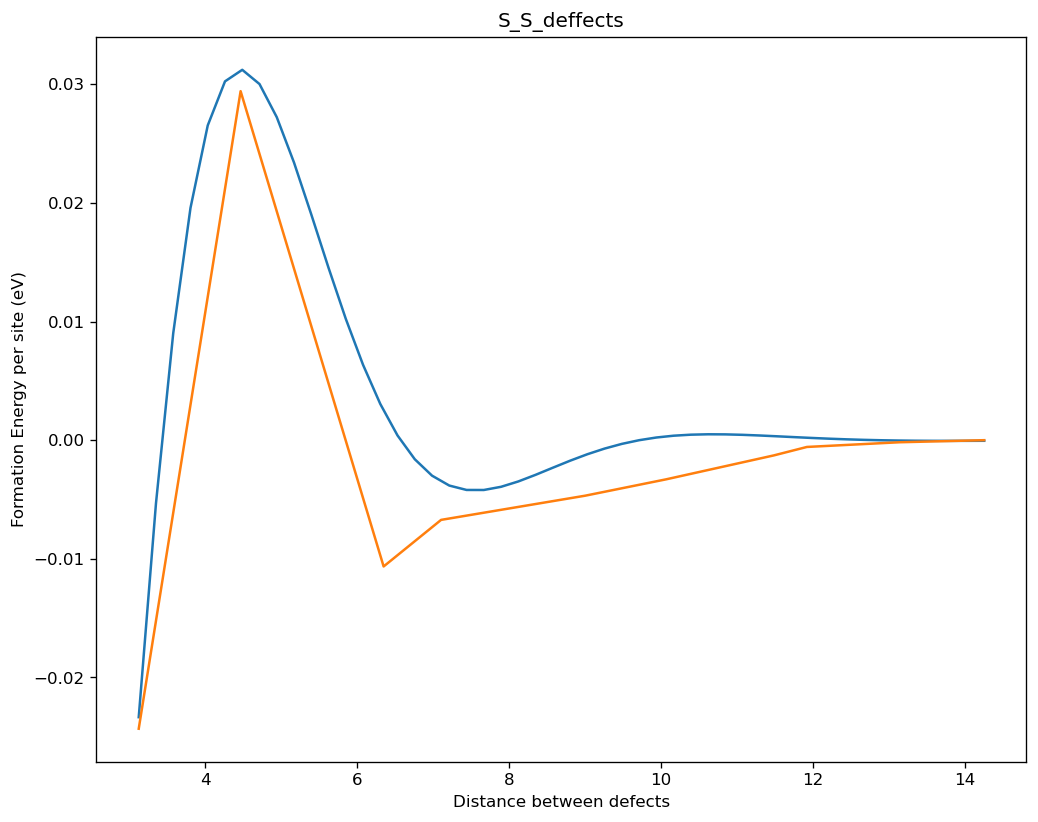

In [135]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=120)

distance= np.linspace(min(Dataset), max(distance))

#Energy = (5.0 - ((np.exp(((5.0 + distance)) / (distance**distance))) / distance))


Energy =  (np.cos((5 - distance)) / ((2**distance) - (-1 - distance)))



#Energy =  ((-1 / (np.cos(distance) + distance)) / (np.cos(distance) + (7 + 8)))



#1Energy =  (np.cos((-1 + distance)) / (np.exp(distance)))

#print(distance)
#plt.plot(distance, Energy)



#print(Energy)                
plt.plot(distance,Energy)

plt.plot(Dataset,Dy)
ax.set_ylabel('Formation Energy per site (eV)'),
ax.set_xlabel('Distance between defects')
ax.set_title('S_S_deffects')

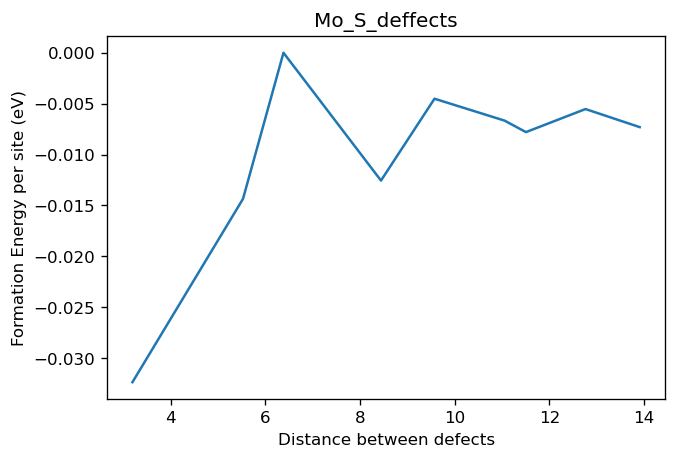

In [10]:

fig, ax = plt.subplots(dpi=120)

ax.set_ylabel('Formation Energy per site (eV)'),
ax.set_xlabel('Distance between defects')
ax.set_title('Mo_S_deffects')
plt.plot(Dataset,Dy)

In [ ]:
Data_for_sibolic = Data.to_numpy()

X = np.array([Data_for_sibolic[var][0].tolist() for var in range(Data_for_sibolic.shape[0])]).reshape(-1,1)

y = Data_for_sibolic[:,4]

Z=np.array([Data_for_sibolic[var][3].tolist() for var in range(Data_for_sibolic.shape[0])]).reshape(-1,1)



#for i in range(Z.shape[0]):
#    np.append(X[i],Z[i])

#Dataset=np.append(X,Z,axis=1)
Dataset=X
Dy = y

In [ ]:
import sys
sys.path.insert(0, '../src')
import pandas as pd
import numpy as np
import roboscientist.equation.equation as rs_equation
from experiments import run_experiment

import roboscientist.equation.operators as rs_operators
from scipy.special import lambertw


import matplotlib.pyplot as plt

In [ ]:
#Data=pd.read_pickle('3deffects_with_2MoS_and_SS_dstances_data_for_simbolic.pkl')
#Data= pd.DataFrame(Data)
Data_for_sibolic = Data.to_numpy()

In [73]:
Data_for_sibolic = Data.to_numpy()

X = np.array([Data_for_sibolic[var][0].tolist() for var in range(Data_for_sibolic.shape[0])])

y = Data_for_sibolic[:,1]

#Z=np.array([Data_for_sibolic[var][3].tolist() for var in range(Data_for_sibolic.shape[0])]).reshape(-1,1)



#for i in range(Z.shape[0]):
#    np.append(X[i],Z[i])

#Dataset=np.append(X,Z,axis=1)
Dataset=X
Dy = y
Dataset

array([[6.81456020e+00, 8.15283752e+00, 1.10515778e+01, 4.44089210e-16],
       [6.81456020e+00, 9.84901530e+00, 6.34802416e+00, 3.12459084e+00],
       [1.29648391e+01, 1.30024671e+01, 1.14847916e+01, 3.12459084e+00],
       ...,
       [1.29585571e+01, 1.48033940e+01, 1.39062637e+01, 0.00000000e+00],
       [5.13884247e+00, 5.13884247e+00, 7.10461294e+00, 3.12459084e+00],
       [5.09108558e+00, 5.09108558e+00, 4.46555508e+00, 3.12459084e+00]])

In [ ]:
X = np.array([Data_for_sibolic[var][0].tolist() for var in range(Data_for_sibolic.shape[0])])


y = Data_for_sibolic[:,1]


Dataset=X
Dy = y
Dataset

In [47]:
Data=pd.read_pickle('./Symbolic_data_distance_dz_3def_GNNs_pred.pkl')
Data= pd.DataFrame(Data)
Data



,distance,formE,megnet_sparse,megnet,gemnet
_id,,,,,
6141cf133ac25c70a5c6c837,"[6.81456020426053, 8.15283752152114, 11.051577...",4.142557,4.128218,4.205160,4.148468
6141cf143ac25c70a5c6c839,"[6.81456020426053, 9.849015303537833, 6.348024...",4.147500,4.126913,4.113856,4.148272
6141cf153ac25c70a5c6c83b,"[12.964839084259287, 13.002467129365924, 11.48...",4.148774,4.136940,4.172619,4.140582
6141cf173ac25c70a5c6c83d,"[3.9879679011360962, 8.152837521521139, 8.4407...",4.116958,4.095382,4.085520,4.072740
6141cf193ac25c70a5c6c83f,"[2.42664862373522, 12.958557120778785, 14.2529...",3.485450,3.495010,3.747991,3.436732
...,...,...,...,...,...
614848553ac25c70a5c6cdfb,"[2.392858899898897, 12.983666738078627, 12.761...",3.490255,3.503575,3.489787,3.464417
614853c33ac25c70a5c6cdfd,"[10.384248457543363, 10.392086694030334, 4.465...",4.165027,4.134846,4.158199,4.155336
6148f3f63ac25c70a5c6cdff,"[12.958557120778785, 14.803393990478009, 13.90...",4.151911,4.136736,4.106874,4.154788


Mse :  0.0008885079908426001
Mae :  0.010822506333042308
StE :  0.0010823634012799067
Std :  0.029503090102490026
[0.01082251 0.00108236 0.02950309]


,Mae,StE,Std
Symbolic,0.010823,0.001082,0.029503


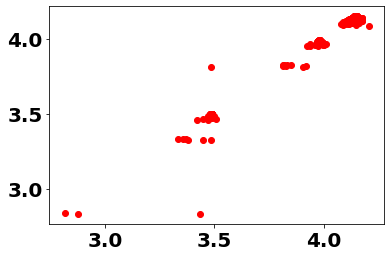

In [79]:
Data_for_sibolic = Data.to_numpy()

X = np.array([Data_for_sibolic[var][0].tolist() for var in range(Data_for_sibolic.shape[0])])

y = Data_for_sibolic[:,1]


Dataset=X
Dy = y


x1=Dataset[:,0]
x2=Dataset[:,1]

x3=Dataset[:,2]

dzS=Dataset[:,3]


Energy=4.207 + (2/3)*((np.cos(0.5) * np.cos((8-2*x1)) - 1)* x1*x1 * np.exp(-x1) + (np.cos(0.5) * np.cos((8-2*x2)) - 1)* x2*x2 * np.exp(-x2) - (1/(15+2*x3)) - 0.06 )
  

from sklearn.metrics import mean_squared_error

y_true = Dy
y_pred = Energy
Mse=mean_squared_error(y_true, y_pred, squared=True)

print('Mse : ',Mse)

from sklearn.metrics import mean_absolute_error

Mae = mean_absolute_error(y_true, y_pred)

print('Mae : ',Mae)

StE = np.std(y_true - y_pred)/ np.sqrt(np.size(y_true))

print('StE : ',StE)


Std = np.std(y_true - y_pred)

print('Std : ',Std)

         
print(np.array([Mae, StE, Std]))
         
Stat_results = pd.DataFrame( np.array([[Mae, StE, Std]]) , columns =['Mae', 'StE', 'Std'],index = ['Symbolic'])
display(Stat_results)


plt.plot(Dy,Energy, 'ro')

Mse :  0.0008311233260020153
Mae :  0.00959947060411882
StE :  0.0010567697920438567
Std :  0.028805458827775632
[0.00959947 0.00105677 0.02880546]


,Mae,StE,Std
Symbolic,0.009599,0.001057,0.028805


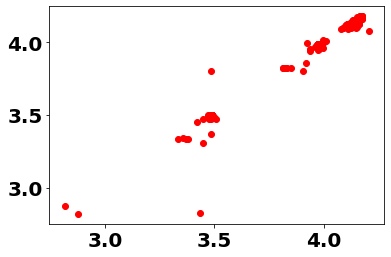

In [64]:
Data_for_sibolic = Data.to_numpy()

X = np.array([Data_for_sibolic[var][0].tolist() for var in range(Data_for_sibolic.shape[0])])

y = Data_for_sibolic[:,1]

#Z=np.array([Data_for_sibolic[var][3].tolist() for var in range(Data_for_sibolic.shape[0])]).reshape(-1,1)



#for i in range(Z.shape[0]):
#    np.append(X[i],Z[i])

#Dataset=np.append(X,Z,axis=1)
Dataset=X
Dy = y


x1=Dataset[:,0]
x2=Dataset[:,1]

x3=Dataset[:,2]

dzS=Dataset[:,3]




EnergyMoS=4.207 + (2/3)*((np.cos(0.5) * np.cos((8-2*x1)) - 1)* x1*x1 * np.exp(-x1) + (np.cos(0.5) * np.cos((8-2*x2)) - 1)* x2*x2 * np.exp(-x2)- 0.086 )


#EnergySS_inonel =  ((-1 / (np.cos(x3) + x3)) / (np.cos(x3) + (7 + 8)))

#EnergySS_sepl = (np.cos((x3 * (x3 + 4))) / ((x3+ 3)**2))

EnergySS_inonel = (np.cos((3 + (x3 - 4))) / ((np.exp(x3)) - (4 - x3)))


EnergySS_sepl =(np.cos((5 - x3)) / ((2**x3) - (-1 - x3)))


Energy_inonel = EnergyMoS[dzS<2]+EnergySS_inonel[dzS<2] 
inonel = Dy[dzS<2]


Energy_sepl = EnergyMoS[dzS>2]+EnergySS_sepl[dzS>2]
sepl = Dy[dzS>2]

Energy = np.concatenate((Energy_inonel, Energy_sepl)) 

Dy = np.concatenate((inonel, sepl))
        

from sklearn.metrics import mean_squared_error

y_true = Dy
y_pred = Energy
Mse=mean_squared_error(y_true, y_pred, squared=True)

print('Mse : ',Mse)

from sklearn.metrics import mean_absolute_error

Mae = mean_absolute_error(y_true, y_pred)

print('Mae : ',Mae)

StE = np.std(y_true - y_pred)/ np.sqrt(np.size(y_true))

print('StE : ',StE)


Std = np.std(y_true - y_pred)

print('Std : ',Std)

         
print(np.array([Mae, StE, Std]))
         
Stat_results = pd.DataFrame( np.array([[Mae, StE, Std]]) , columns =['Mae', 'StE', 'Std'],index = ['Symbolic'])
display(Stat_results)


plt.plot(Dy,Energy, 'ro')



In [53]:
Data['formE'].values

array([4.14255738, 4.14749994, 4.14877433, 4.11695788, 3.48544994,
       3.98429471, 4.1436113 , 4.1471867 , 4.15113582, 4.14601167,
       4.14636364, 4.14357905, 3.96121755, 4.14941063, 3.48642635,
       4.14749843, 4.15256298, 3.9707461 , 4.14987042, 4.13831573,
       4.12879448, 4.1695393 , 3.97757609, 4.13690724, 3.98128948,
       4.13735297, 3.99235829, 3.98112486, 4.14257198, 4.11781904,
       4.13327001, 4.14345622, 4.14600985, 4.14441444, 3.9747258 ,
       4.1441709 , 4.14458048, 4.14126982, 3.97931953, 4.14407873,
       4.16127302, 3.48744891, 4.15025916, 4.14180738, 3.97440104,
       3.97926887, 4.12955869, 4.13439379, 3.90766932, 4.13161132,
       4.14792241, 4.14946826, 4.14809668, 3.9771313 , 4.13770787,
       4.12132002, 4.1363647 , 4.13369755, 4.11927561, 4.12737519,
       4.13402934, 3.98220771, 4.14728656, 3.37886814, 4.14641817,
       4.14239025, 3.48558129, 4.17726552, 4.14644359, 4.13661434,
       3.47701441, 4.1384989 , 4.14934705, 4.12057725, 4.12757

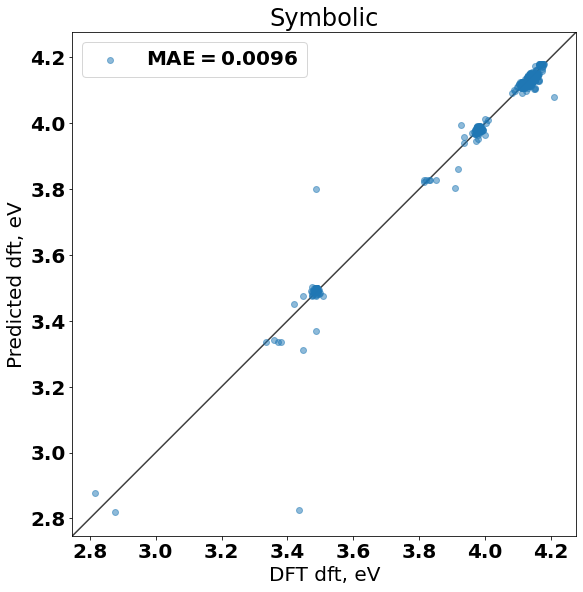

In [59]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}

plt.rc('font', **font)

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

plt.show()
def plot(predictions, true_targets, experiment_name, target_name):
    mae = np.abs(predictions - true_targets).mean()
    fig, ax = plt.subplots()
    ax.scatter(true_targets,
                predictions,
                label=f"$\mathrm{{MAE}}={mae:.4f}$",
                alpha=0.5)
    ax.set_xlabel(f"DFT {target_name}, eV")
    ax.set_ylabel(f"Predicted {target_name}, eV")
    ax.legend()

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
#    plots_folder.mkdir(exist_ok=True, parents=True)
    set_size(7, 7, ax=ax)
    ax.set_title(experiment_name)
    # fig.show()


plot(Energy,Dy,'Symbolic','dft')

megnet_sparse
Mse :  0.0012708531999217195
Mae :  0.017157557915161683
StE :  0.001296226814162146
Std :  0.03533258464418418


/tmp/ipykernel_8624/2338519387.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Stat_results = Stat_results.append(Stat_results_MS)


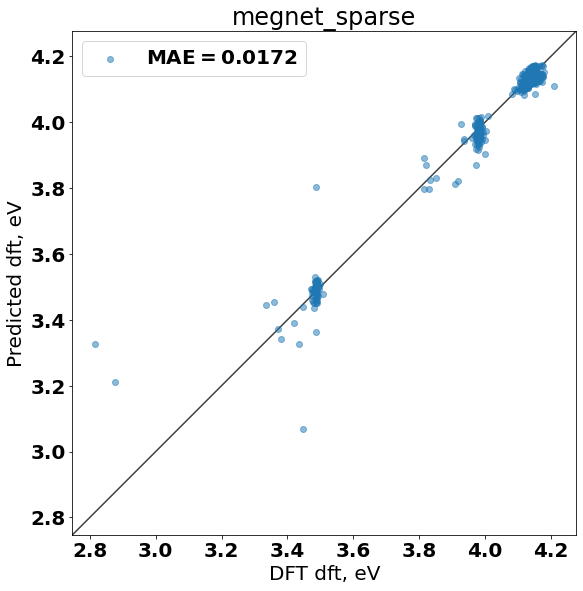

In [60]:
from sklearn.metrics import mean_squared_error

y_true = Data['formE'].values
y_pred = Data_for_sibolic[:,2]

#y_pred = Data['megnet_sparse'].values

Mse=mean_squared_error(y_true, y_pred, squared=True)
print('megnet_sparse')
print('Mse : ',Mse)

from sklearn.metrics import mean_absolute_error

Mae = mean_absolute_error(y_true, y_pred)

print('Mae : ',Mae)

StE = np.std(y_true - y_pred)/ np.sqrt(np.size(y_true))

print('StE : ',StE)

Std = np.std(y_true - y_pred)

print('Std : ',Std)

Stat_results_MS = pd.DataFrame( np.array([[Mae, StE, Std]]) , columns =['Mae', 'StE', 'Std'],index = ['megnet_sparse'])
Stat_results = Stat_results.append(Stat_results_MS)

plot(y_pred,y_true,'megnet_sparse','dft')

In [7]:
from scipy.stats import sem

sem(y_true - y_pred)

0.01053610549856096

In [ ]:
Energy =  ((-1 / (np.cos(distance) + distance)) / (np.cos(distance) + (7 + 8)))

megnet
Mse :  0.019230379040288643
Mae :  0.08789394964529272
StE :  0.005017842971798846
Std :  0.1367764958996826


/tmp/ipykernel_8624/3040716855.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Stat_results = Stat_results.append(Stat_results_M)


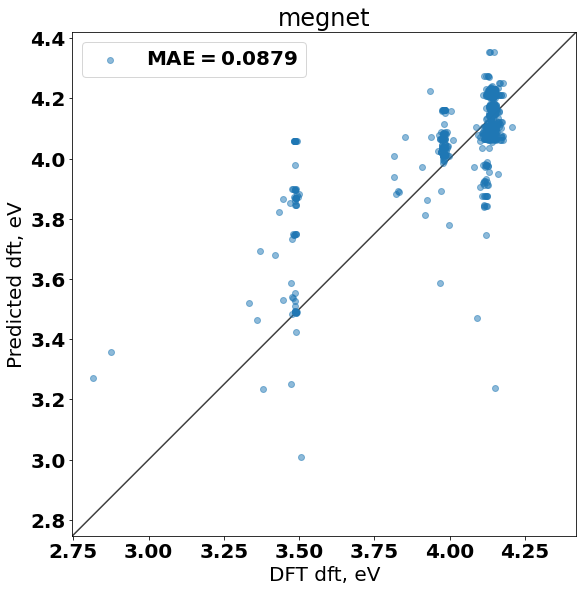

In [61]:
from sklearn.metrics import mean_squared_error

y_true = Data['formE'].values
y_pred = Data_for_sibolic[:,3]
Mse=mean_squared_error(y_true, y_pred, squared=True)
print('megnet')
print('Mse : ',Mse)

from sklearn.metrics import mean_absolute_error

Mae = mean_absolute_error(y_true, y_pred)

print('Mae : ',Mae)

StE = np.std(y_true - y_pred)/ np.sqrt(np.size(y_true))

print('StE : ',StE)

Std = np.std(y_true - y_pred)

print('Std : ',Std)


Stat_results_M = pd.DataFrame( np.array([[Mae, StE, Std]]) , columns =['Mae', 'StE', 'Std'],index = ['megnet'])

Stat_results = Stat_results.append(Stat_results_M)

plot(y_pred,y_true,'megnet','dft')

gemnet
Mse :  0.0009862915639919233
Mae :  0.015941821512268306
StE :  0.0011448538480419651
Std :  0.03120645634638345


/tmp/ipykernel_8624/1643236874.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Stat_results = Stat_results.append(Stat_results_G)


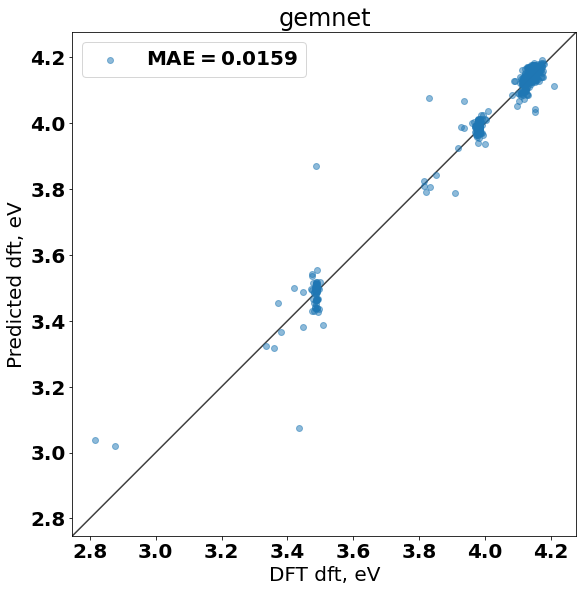

In [62]:
from sklearn.metrics import mean_squared_error

y_true = Data['formE'].values
y_pred = Data_for_sibolic[:,4]
Mse=mean_squared_error(y_true, y_pred, squared=True)
print('gemnet')
print('Mse : ',Mse)

from sklearn.metrics import mean_absolute_error

Mae = mean_absolute_error(y_true, y_pred)

print('Mae : ',Mae)

StE = np.std(y_true - y_pred)/ np.sqrt(np.size(y_true))

print('StE : ',StE)

Std = np.std(y_true - y_pred)

print('Std : ',Std)

Stat_results_G = pd.DataFrame( np.array([[Mae, StE, Std]]) , columns =['Mae', 'StE', 'Std'],index = ['gemnet'])
Stat_results = Stat_results.append(Stat_results_G)
plot(y_pred,y_true,'gemnet','dft')

In [63]:
Stat_results

,Mae,StE,Std
Symbolic,0.009599,0.001057,0.028805
megnet_sparse,0.017158,0.001296,0.035333
megnet,0.087894,0.005018,0.136776
gemnet,0.015942,0.001145,0.031206


In [ ]:
x1=Dataset[:,0]
x2=Dataset[:,1]

x3=Dataset[:,2]

In [67]:
effective_dist = x1 + 0.1*x2 + 0.01*x3
effective_dist 

array([ 7.86294198, 14.37993371,  3.86503407,  8.04893469, 10.59786035,
       12.67240705, 12.59282569, 13.5305671 ,  7.90218184,  7.70789028,
       11.76710958,  6.23322777,  6.50618021,  6.40855111,  9.40132799,
       10.47607181, 11.28121669,  6.05745343,  8.26000333, 10.48513246,
        8.06305068, 11.3186031 ,  6.52909466,  8.69479299,  9.73385765,
        5.66651618,  7.90179454, 10.7461705 ,  7.9236064 ,  6.28885202,
        5.23576815,  8.25123986,  3.85451476, 13.73292772, 11.75142265,
        8.48047574,  8.6068909 ,  8.76748648,  3.75618191, 10.40658205,
        6.47482397, 11.0222744 ,  5.9351464 ,  5.36390837,  3.46776591,
        8.62907567,  4.89371507,  3.55586278,  3.41553709,  3.88405091,
       11.15580558, 11.30409084,  5.23865034,  7.51410706,  9.58848326,
       11.48407377,  9.56605211, 13.59630493, 10.58888582,  2.83631124,
        4.71407947,  8.09043197,  8.88598526,  7.70089009, 10.63572562,
        8.99936718,  8.26536484,  5.86852926,  4.9630767 ,  5.15

Text(0.5, 1.0, 'Symbolic vs DFT')

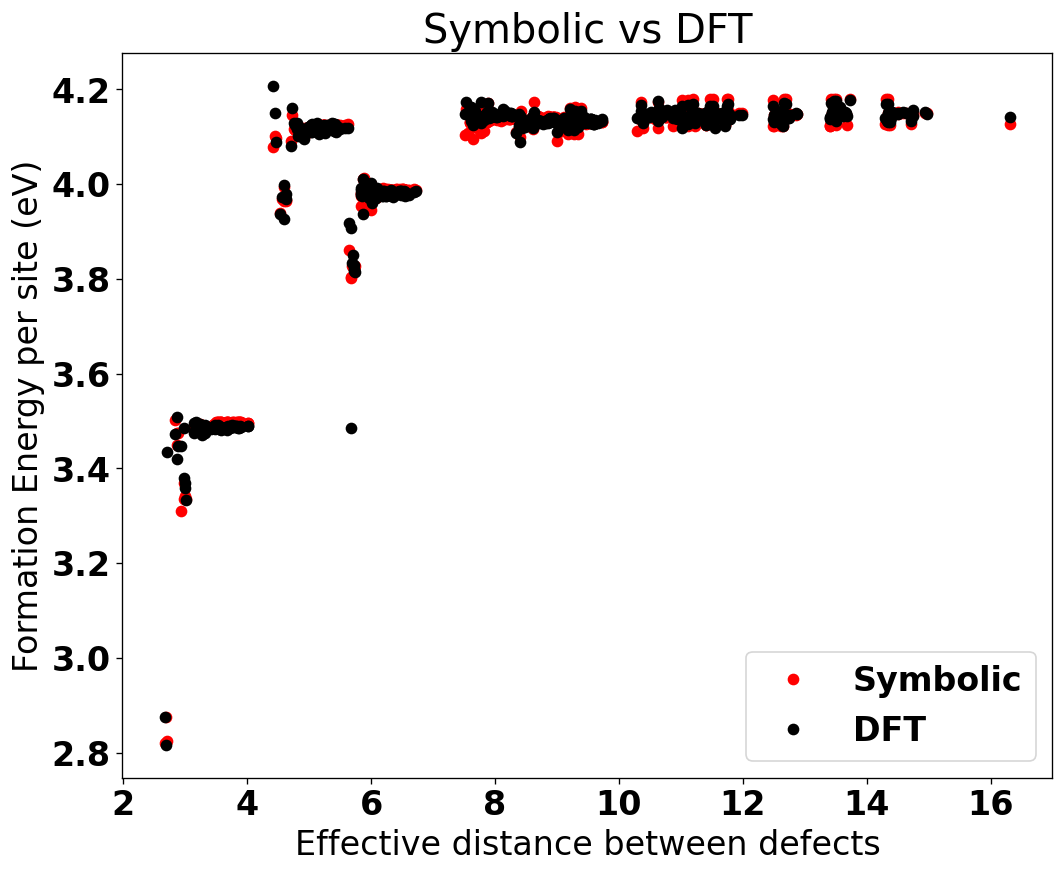

In [74]:
effective_dist = x1 + 0.1*x2 + 0.01*x3
effective_dist_inonel = effective_dist[dzS<2]
effective_dist_sepl = effective_dist[dzS>2]
effective_dist = np.concatenate((effective_dist_inonel,effective_dist_sepl))



fig, ax = plt.subplots(figsize=(10, 8), dpi=120)
plt.plot(effective_dist,Energy, 'ro', label = 'Symbolic')

plt.plot(effective_dist,Dy, 'ko', label = 'DFT')
ax.legend(loc='lower right')
ax.set_ylabel('Formation Energy per site (eV)'),
ax.set_xlabel('Effective distance between defects')
ax.set_title('Symbolic vs DFT')

In [49]:
Data['formE'].values

array([4.14255738, 4.14749994, 4.14877433, 4.11695788, 3.48544994,
       3.98429471, 4.1436113 , 4.1471867 , 4.15113582, 4.14601167,
       4.14636364, 4.14357905, 3.96121755, 4.14941063, 3.48642635,
       4.14749843, 4.15256298, 3.9707461 , 4.14987042, 4.13831573,
       4.12879448, 4.1695393 , 3.97757609, 4.13690724, 3.98128948,
       4.13735297, 3.99235829, 3.98112486, 4.14257198, 4.11781904,
       4.13327001, 4.14345622, 4.14600985, 4.14441444, 3.9747258 ,
       4.1441709 , 4.14458048, 4.14126982, 3.97931953, 4.14407873,
       4.16127302, 3.48744891, 4.15025916, 4.14180738, 3.97440104,
       3.97926887, 4.12955869, 4.13439379, 3.90766932, 4.13161132,
       4.14792241, 4.14946826, 4.14809668, 3.9771313 , 4.13770787,
       4.12132002, 4.1363647 , 4.13369755, 4.11927561, 4.12737519,
       4.13402934, 3.98220771, 4.14728656, 3.37886814, 4.14641817,
       4.14239025, 3.48558129, 4.17726552, 4.14644359, 4.13661434,
       3.47701441, 4.1384989 , 4.14934705, 4.12057725, 4.12757

Text(0.5, 1.0, 'megnet_sparse vs DFT')

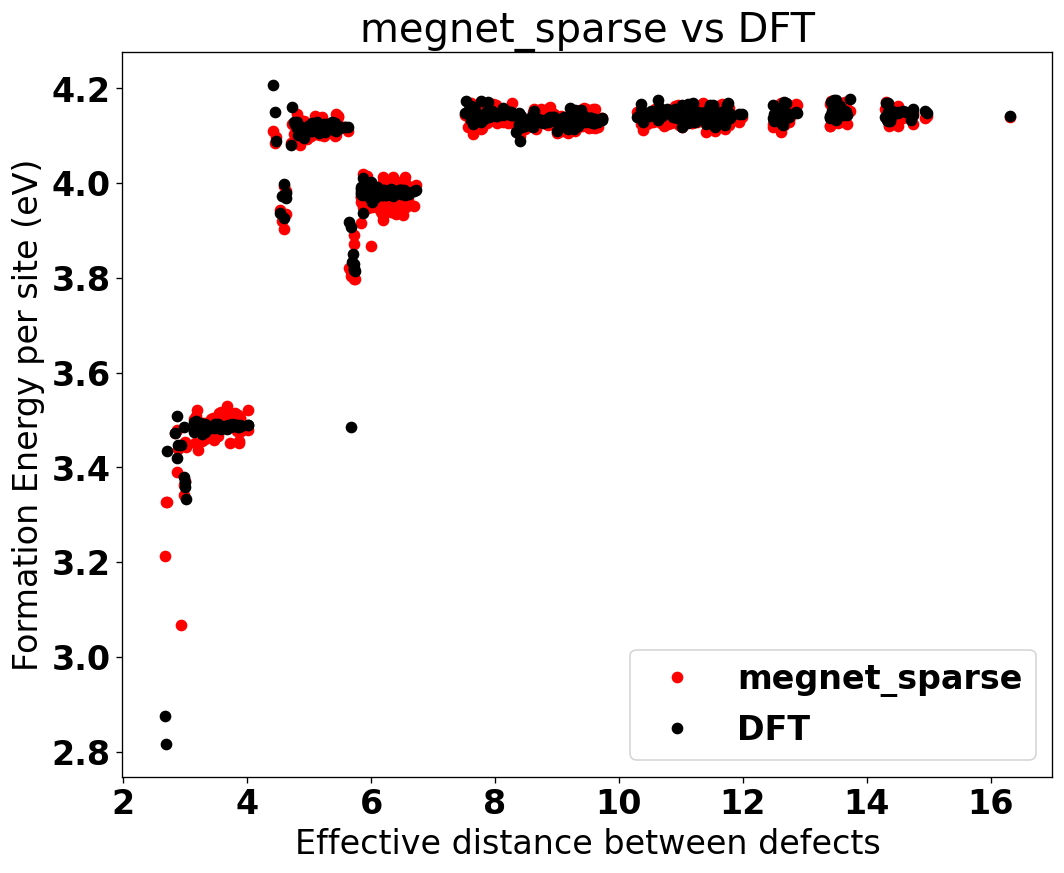

In [71]:
effective_dist = x1 + 0.1*x2 + 0.01*x3
fig, ax = plt.subplots(figsize=(10, 8), dpi=120)

plt.plot(effective_dist,Data['megnet_sparse'].values, 'ro', label = 'megnet_sparse')

plt.plot(effective_dist,Data['formE'].values, 'ko', label = 'DFT')
ax.legend(loc='lower right')
ax.set_ylabel('Formation Energy per site (eV)'),
ax.set_xlabel('Effective distance between defects')
ax.set_title('megnet_sparse vs DFT')